In [1]:
%matplotlib inline

import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.power import tt_ind_solve_power
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from math import ceil
import warnings
warnings.filterwarnings('ignore')

boston = datasets.load_boston()

x = boston.data
y = boston.target

In [2]:
target_df = pd.DataFrame(y)
df = pd.DataFrame(x)
target_df.rename(columns={0:'MEDV'}, inplace=True)
df.rename(columns={0:'CRIM', 1: 'ZN', 2: 'INDUS', 3: 'CHAS', 4: 'NOX', 5: 'RM', 6: 'AGE', 7: 'DIS', 8: 'RAD', 9: 'TAX', 10: 'PTRATIO', 11: 'B', 12: 'LSTAT'}, inplace=True)
df = df.merge(target_df, left_index=True, right_index=True)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Part 1
Choose a variable (other than CHAS and MEDV)

The chosen variable is PTRATIO (pupil-teacher ratio per town)

1. Compute the mean and standard dev of PTRATIO

In [4]:
mean = round(df['PTRATIO'].mean(), 3)
std = round(df['PTRATIO'].std(), 3)

print(f"The average pupil-teacher ratio = {mean}")
print(f"The standard deviation of pupil-teacher ratio = {std}")

The average pupil-teacher ratio = 18.456
The standard deviation of pupil-teacher ratio = 2.165


2. Plot a histogram of PTRATIO

Text(0.5, 1.0, 'Frequency of Pupil to Teacher Ratio per Town')

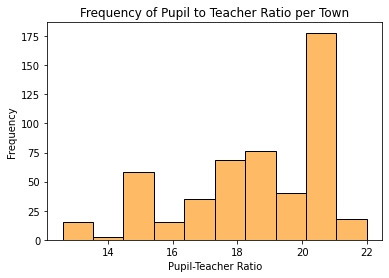

In [5]:
sns.histplot(data=df, x=df['PTRATIO'], color='darkorange', alpha=0.6, bins=10)
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Frequency of Pupil to Teacher Ratio per Town")

3. What is the sample correlation between PTRATIO and MEDV?

In [6]:
corr = df['MEDV'].corr(df['PTRATIO']).round(3)
print(f"The correlation between median home price and pupil-teacher ratio = {corr}")

The correlation between median home price and pupil-teacher ratio = -0.508


4. Perform a regression, predicting MEDV from PTRATIO

In [7]:
predictors = sm.add_constant(data=df.PTRATIO, prepend=False)

lm_mod = sm.OLS(df.MEDV, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.61e-34
Time:                        18:41:13   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO       -2.1572      0.163    -13.233      0.0

The regression equation is : MEDV' = 62.345 - 2.157(PTRATIO)

Text(0.5, 1.0, 'Median Home Price with Pupil-Teacher Ratio with Regression Line')

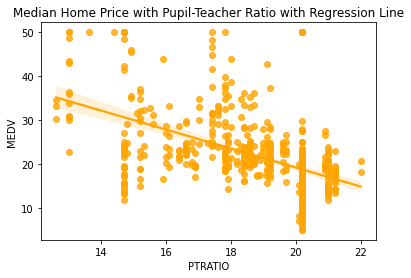

In [8]:
sns.regplot(x="PTRATIO", y="MEDV", data=df, color='orange')
plt.title("Median Home Price with Pupil-Teacher Ratio with Regression Line")

As the Pupil-Teacher ratio increases, the median home price decreases. A higher PTRATIO indicates that there are fewer teachers per student in the area, which could be an indication of lower funding for public education. Every 2.16 points that PTRATIO increases, median home price decreases by a point. These results are statistically significant and be unlikely due to random chance if the null hypothesis (PTRATIO does not influence MEDV) were true (F-statistic = 175.1, p-value < .001).

# Part 2
I have a theory that tracts that border the Charles River will have a higher median price than those that do not.

1. What is the null hypothesis?

The null hypothesis is that, within the population, the average price of homes that fall within a tract that borders the Charles River is the same as the average price of homes that do not.

2. Calculate the p-value
3. Calculate the 90% confidence level

In [9]:
def t_test_two_samp(a, b, alpha, alternative='two-sided'):
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['Mean0', 'Mean1', 'DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low90CI', 'High90CI']
    return pd.Series([a.mean(), b.mean(), degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test_two_samp(df.loc[df.CHAS == 0.0, 'MEDV'], df.loc[df.CHAS == 1.0, 'MEDV'], 0.1)
test

Mean0         22.093843
Mean1         28.440000
DegFreedom    36.876409
Difference    -6.346157
Statistic     -3.996437
PValue         0.000074
Low90CI       -9.785438
High90CI      -2.906876
dtype: float64

4. Assume an effect size of 0.6, what group size is necessary for 80% power?

In [10]:
size = ceil(tt_ind_solve_power(effect_size=0.6, nobs1=None, power=0.8, alpha=0.5, ratio=1, alternative='two-sided'))

print(f"For an effect size of 60% and power of 80%, a group size of {size} is required")

For an effect size of 60% and power of 80%, a group size of 12 is required


Tracts that border the Charles river have a higher average housing price than those that don't by approximately $6,000. It can be stated with 90% confidence that the actual difference in the population is somewhere between $9,800 and $2,900. This difference is statistically significant and unlikely to be due to random chance (p-value < .001).

5. Calculate the Cohen's d for the means of the two groups (tracts bordering the river and those that don't)

In [11]:
# seeing the size of the two groups
y_chas = df[df['CHAS'] == 1]
n_chas = df[df['CHAS'] == 0]
print(y_chas.shape)
print(n_chas.shape)

(35, 14)
(471, 14)


In [12]:
# The means calculated for the two groups are above, MEDV for y_chas has a mean of 28.44 and MEDV for n_chas has a mean of 22.094
# calculating the std of each:
y_chas_n = 35
n_chas_n = 471
y_chas_std = y_chas['MEDV'].std()
n_chas_std = n_chas['MEDV'].std()
print(y_chas_std)
print(n_chas_std)

11.816643297634458
8.831362409577903


In [13]:
# Calculating pooled std
import math
pooled_std = math.sqrt((((y_chas_n-1)*y_chas_std*y_chas_std+(n_chas_n-1)*n_chas_std*n_chas_std)/(y_chas_n+n_chas_n-2)))
# Calculating effect size
cohens_d = (22.094 - 28.44) / pooled_std
print(f"The effect size is {abs(round(cohens_d, 3))}")

The effect size is 0.7


The effect size is classified as large. It indicates that the mean prices of houses that are part of a tract that is along the Charles river differs from the houses that are not part of these tracts by .7 standard deviations.

# Part 2.5

In [14]:
# drop target data from df to create full regression model
df.drop(['MEDV'], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
X = df
y = target_df

In [16]:
# Splitting variables as training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

In [17]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62


In [18]:
y_train.head()

,MEDV
463,20.2
75,21.4
478,14.6
199,34.9
84,23.9


In [19]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [20]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:", mlr.coef_)

Intercept:  [33.11584094]
Coefficients: [[-7.69175693e-02  3.95527497e-02 -6.09889801e-03  2.63034959e+00
  -1.31416178e+01  3.84418005e+00 -1.20624925e-02 -1.37626293e+00
   2.83925319e-01 -1.40640197e-02 -9.18566330e-01  1.05783116e-02
  -4.37960459e-01]]


In [21]:
y_pred_mlr = mlr.predict(X_test)
y_test.reset_index(inplace=True)
y_test.drop(['index'],axis=1, inplace=True)
y_pred = pd.DataFrame(y_pred_mlr)
compare_df = y_pred.merge(y_test, left_index=True, right_index=True)

In [22]:
compare_df.rename(columns={0: 'Prediction', 'MEDV': 'Actual'}, inplace=True)
compare_df.head()

,Prediction,Actual
0,34.016513,34.6
1,31.051895,31.5
2,22.338845,20.6
3,18.083835,14.5
4,20.566881,16.2


In [23]:
# evaluating the model
from sklearn import metrics
import numpy as np

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)

print('R squared: {:.2f}'.format(mlr.score(X_test, y_test)*100))
print('Mean Absolute Error:', meanAbErr)

R squared: 70.58
Mean Absolute Error: 3.4719478482701565


Interpretations:
- 73.6% of the variation in the data can be explained through the model (R-squared)
- The difference between the predicted values and the true values on average is 3.5 points (mean absolute error value)

Text(0.5, 1.0, 'Actual Median Housing Price vs. Predicted Price (In thousands)')

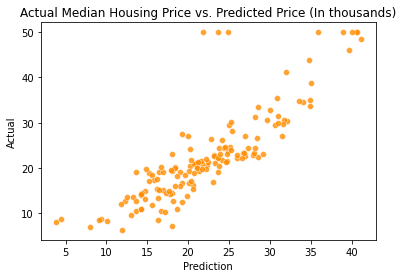

In [24]:
# Actual data vs predicted data
sns.scatterplot(data=compare_df, x='Prediction', y='Actual', alpha=0.8, color='darkorange')
plt.title("Actual Median Housing Price vs. Predicted Price (In thousands)")

In [25]:
# Test out new values based on the regression model
crim = float(input("Enter per capita crime rate by town: "))
zn = float(input("Enter proportion of residential land zoned for lots over 25,000 sq ft: "))
indus = float(input("Enter proportio of non-retail business acres per town: "))
chas = float(input("Enter Charles River dummy variable: "))
nox = float(input("Enter nitric acid concentration (ppm): "))
rm = float(input("Enter average number of rooms per dwelling: "))
age = float(input("Enter proportion of owner-occupied units built prior to 1940: "))
dis = float(input("Enter weighted differences to five boston employment centers: "))
rad = float(input("Enter index of accessibility to radial highways: "))
tax = float(input("Enter full value of property tax per $10,000: "))
ptratio = float(input("Enter enter the pupil-teacher ratio: "))
b = float(input("Enter proportion of Black individuals by town: "))
lstat = float(input("Enter percentage of lower status of population: "))

prediction = 33.11584094 - 7.69175693e-02*crim + 3.95527497e-02*zn - 6.09889801e-03*indus + 2.63034959e+00*chas - 1.31416178e+01*nox + 3.84418005e+00*rm - 1.20624925e-02*age - 1.37626293e+00*dis + 2.83925319e-01*rad - 1.40640197e-02*tax - 9.18566330e-01*ptratio + 1.05783116e-02*b - 4.37960459e-01*lstat
prediction = round(prediction*1000, 2)

print("The estimated median value of a home in this area is ${:,.2f}".format(prediction))

The estimated median value of a home in this area is $29,401.90
